In [1]:
%matplotlib notebook

In [2]:
import numpy as np

from sklearn.metrics import mean_squared_error

# Generate Synthetic Data

<IPython.core.display.Javascript object>


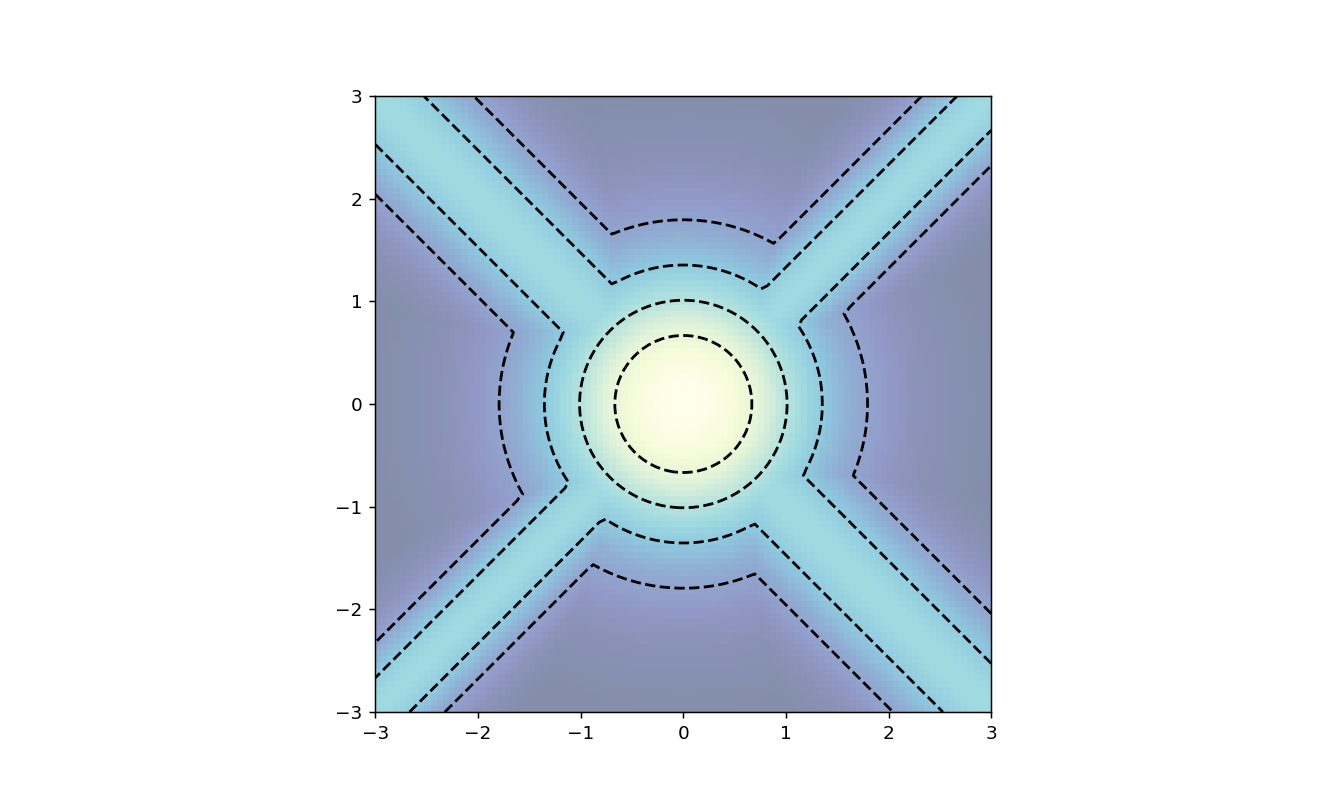

In [3]:
n_samples = 2000
n_features = 2

from drforest.datasets import make_simulation1

X, y = make_simulation1(n_samples=n_samples, n_features=n_features, noise=1, random_state=123)

# visualize the function 
def f(x, y):
    r1 = x - y
    r2 = x + y
    return (20 * np.maximum(
        np.maximum(np.exp(-2 * r1 ** 2), np.exp(-r2 ** 2)),
        2 * np.exp(-0.5 * (x ** 2 + y ** 2))))
x_ = np.linspace(-3, 3, 100)
y_ = np.linspace(-3, 3, 100)
XX, YY = np.meshgrid(x_, y_)
Z = f(XX, YY)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(XX, YY, Z, 3, colors='black', linestyles='--', levels=5, linewidths=1.5)
ax.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='YlGnBu_r', alpha=0.5)
ax.set_aspect('equal')

# Train a Dimension Reduction Forest

In [4]:
from drforest.ensemble import DimensionReductionForestRegressor

# train forest
forest = DimensionReductionForestRegressor(
    n_estimators=500, min_samples_leaf=1, n_jobs=-1, random_state=42)

forest.fit(X, y)

# predictions
y_pred = forest.predict(X)
print("Training MSE: {:.2f}".format(mean_squared_error(y, y_pred)))
print("Out-of-bag MSE: {:.2f}".format(forest.oob_mse_))

Training MSE: 0.19
Out-of-bag MSE: 1.34


# Kernel Function

<IPython.core.display.Javascript object>


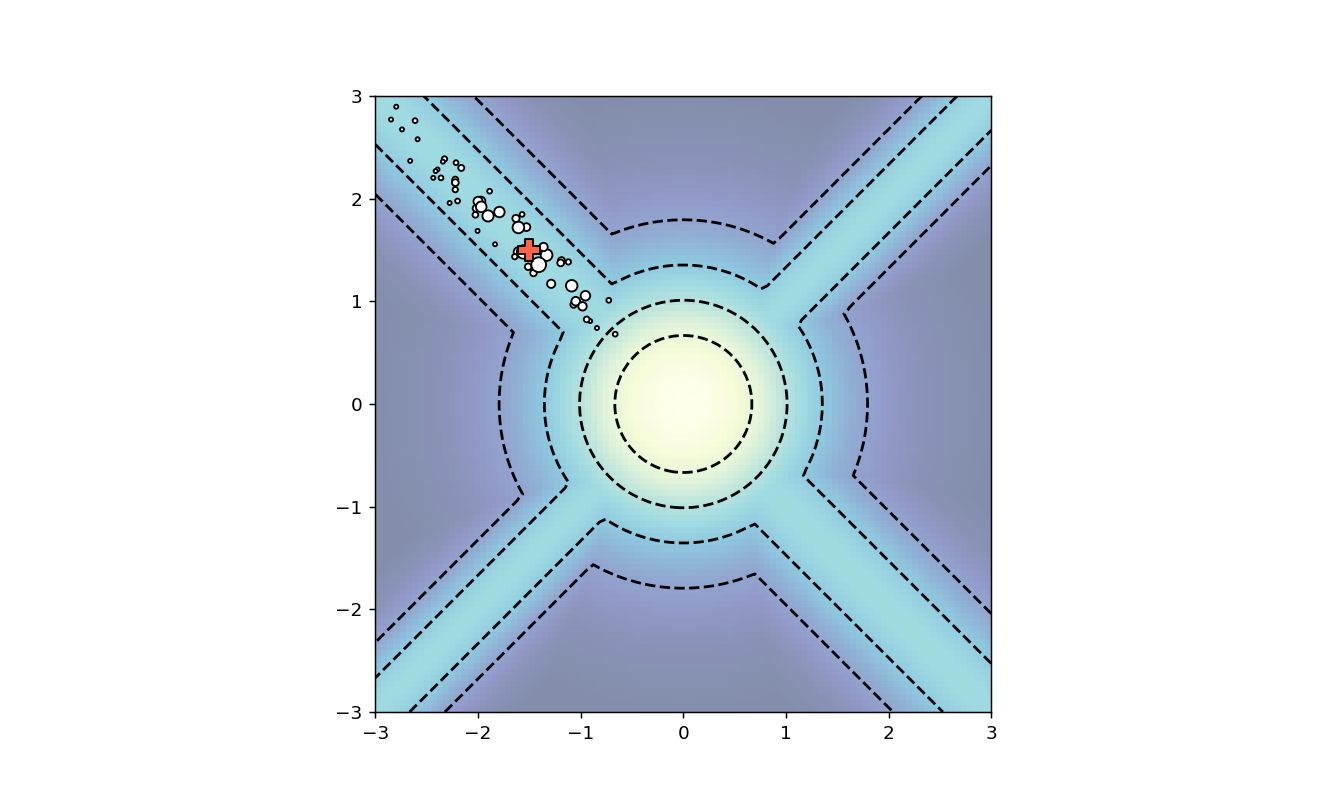

In [5]:
K = forest([-1.5, 1.5])
K /= K.sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(XX, YY, Z, 3, colors='black', linestyles='--', levels=5, linewidths=1.5)
ax.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='YlGnBu_r', alpha=0.5)
ax.set_aspect('equal')

ax.scatter(X[:, 0], X[:, 1], s=150 * np.sqrt(K), c='w', edgecolor='k')
ax.scatter(-1.5, 1.5, color='tomato', edgecolor='black', marker='P', s=150)

<IPython.core.display.Javascript object>


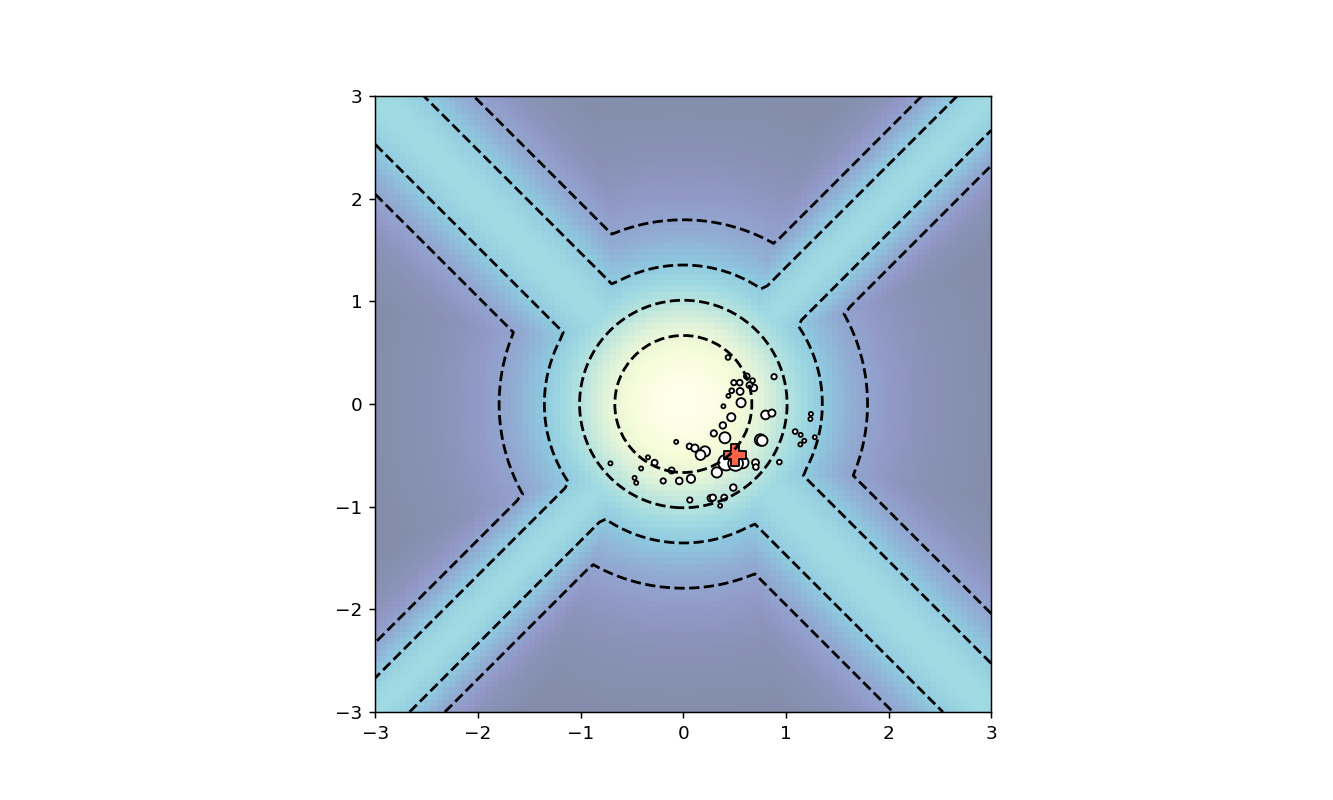

In [6]:
K = forest([0.5, -0.5])
K /= K.sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(XX, YY, Z, 3, colors='black', linestyles='--', levels=5, linewidths=1.5)
ax.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='YlGnBu_r', alpha=0.5)
ax.set_aspect('equal')

ax.scatter(X[:, 0], X[:, 1], s=150 * np.sqrt(K), c='white', edgecolor='k')
ax.scatter(0.5, -0.5, color='tomato', edgecolor='black', marker='P', s=150)